In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [5]:
import io
from keras import regularizers
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [7]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [8]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [9]:
x_data= data.drop(columns="Class", axis=0)
label = data["Class"]

In [10]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [11]:
train_data.shape, test_data.shape

((688, 30), (296, 30))

In [12]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [13]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

In [70]:
model= models.Sequential()
model.add(layers.Dense(20, activation="relu", input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(6,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [71]:
x_val = train_data[:1000]
partial_x_train_data = train_data[1000:]

In [72]:
y_val = train_data[:1000]
partial_y_train_data = train_data[1000:]

In [73]:
history=model.fit(train_data, train_labels, epochs=150, validation_split=.2)

Epoch 1/150
18/18 [==============================] - 1s 16ms/step - loss: 0.6904 - accuracy: 0.6361 - val_loss: 0.6825 - val_accuracy: 0.7536
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.7931 - val_loss: 0.6551 - val_accuracy: 0.7899
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.8404 - val_loss: 0.5991 - val_accuracy: 0.7971
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.8809 - val_loss: 0.5350 - val_accuracy: 0.8188
Epoch 5/150
18/18 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.9104 - val_loss: 0.4739 - val_accuracy: 0.8261
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.9080 - val_loss: 0.4159 - val_accuracy: 0.8406
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3422 - accuracy: 0.9092 - val_loss: 0.3664 - val_accuracy: 0.8551
Epoch 8/150


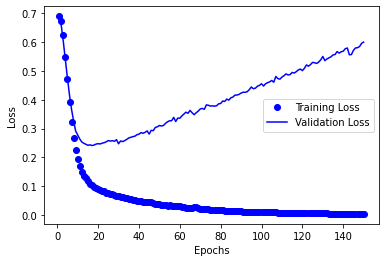

In [74]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

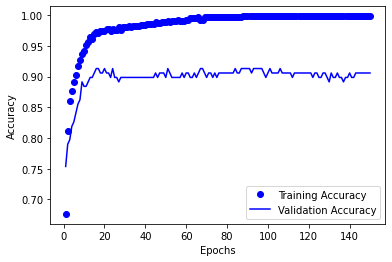

In [75]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:], "bo", label="Training Accuracy")
plt.plot(epochs[:], val_acc[:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [76]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.9189


In [77]:
test_acc_score *100

91.89189076423645

In [85]:
prediction=model.predict(test_data)

In [86]:
prediction[25:50]

array([[1.3896823e-04],
       [8.2630186e-07],
       [1.0000000e+00],
       [2.1431446e-03],
       [1.5373355e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.4722120e-07],
       [1.1629000e-06],
       [1.5634298e-04],
       [3.5762805e-06],
       [4.1004900e-05],
       [1.0000000e+00],
       [1.2596668e-06],
       [1.0000000e+00],
       [1.0004938e-03],
       [1.0000000e+00],
       [3.7074685e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9100906e-01],
       [9.5993805e-01],
       [7.3202145e-01],
       [9.9997663e-01],
       [1.0000000e+00]], dtype=float32)

In [87]:
test_labels[25:50]

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1.])